In [1]:
import sys
sys.path.append("/u/lukas.rilling/dev/")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
%matplotlib widget

from returnn_training_progress import get_epoch_data
from returnn_training_plot_nb import plot_df
%load_ext autoreload
%autoreload 2

In [2]:
files = {
    # "glowTTS/training": "GlowTTS Newbob",
    # "glowTTS/enc192/100ep/silence_preprocessed/training/": "GlowTTS warmup",
    # "glowTTS/enc192/200ep/RAdam/lr1e-3/silence_preprocessed/training/": "GlowTTS RAdam 1e-3",
    # "glowTTS/enc192/200ep/RAdam/lr1e-4/silence_preprocessed/training/": "GlowTTS RAdam 1e-4",
    # "glowTTS/enc192/200ep/RAdam/lr1e-5/silence_preprocessed/training/": "GlowTTS RAdam 1e-5",
    # "glowTTS/enc192/200ep/RAdam/lr1e-6/silence_preprocessed/training/": "GlowTTS RAdam 1e-6",
    # "glowTTS/enc192/200ep/long_cooldown/not_silence_preprocessed/training/": "192-channels encoder",
    # "glowTTS_nar_taco_encoder/not_silence_preprocessed/training/": "CNN+BLSTM encoder",
    # "asr_dataset/spec_augment/glow_enc192_200ep_not_silence_preprocessed/training/": "Conformer ASR on GlowTTS Features",
    # "asr_dataset/no_spec_augment/glow_enc192_200ep_not_silence_preprocessed/training/": "GlowTTS 192 no spec aug",
    # "asr_dataset/spec_augment/no_glow/training/": "Conformer ASR Baseline",
    # "asr_dataset/no_spec_augment/no_glow/training/": "Conformer ASR Baseline no spec aug",
}

In [3]:
# root = "/u/lukas.rilling/experiments/glow_tts_asr/alias/experiments/librispeech/tts_architecture/glow_tts/pytorch/"
root = "/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/tts_architecture/glow_tts/raw_audio/"
# root = "/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/librispeech_glow_asr/pytorch/conformer/"


In [4]:
lr_files = []
for f in files.keys():
    lr_files.append(f"{root}{f}/work/learning_rates")

In [5]:
lr_files = "/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/librispeech_glow_asr/pytorch/conformer/asr_dataset/spec_augment/glow_enc192_200ep_not_silence_preprocessed_not_*/training"
# lr_files = "/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/librispeech_glow_asr/pytorch/conformer/asr_dataset/spec_augment/glow_enc192_100ep_not_silence_preprocessed_speaker_drop_*/training"

lr_files = glob.glob(lr_files)

common_prefix = os.path.commonpath(lr_files)
common_sufix = os.path.commonpath([l[::-1] for l in lr_files])[::-1]

names = []
for f in lr_files:
    names.append(f.removeprefix(common_prefix).removesuffix(common_sufix))

files = dict(zip(lr_files, names))
files

{'/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/librispeech_glow_asr/pytorch/conformer/asr_dataset/spec_augment/glow_enc192_200ep_not_silence_preprocessed_not_pretrained/training': '/glow_enc192_200ep_not_silence_preprocessed_not_pretrained/',
 '/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/librispeech_glow_asr/pytorch/conformer/asr_dataset/spec_augment/glow_enc192_200ep_not_silence_preprocessed_not_freezed/training': '/glow_enc192_200ep_not_silence_preprocessed_not_freezed/'}

In [6]:
lr_files.append("/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/librispeech_glow_asr/pytorch/conformer/asr_dataset/spec_augment/no_glow/training")
files[lr_files[-1]] = "Baseline Conformer Only"

lr_files.append("/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/librispeech_glow_asr/pytorch/conformer/asr_dataset/spec_augment/glow_enc192_200ep_not_silence_preprocessed/training")
files[lr_files[-1]] = "Baseline"


In [7]:
# plot_lr = True
plot_lr = False

Large Font: False
Setup Interactive Legend
Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous view', 'arrow-left', 'back'), ('Forward', 'Forward to next view', 'arrow-right', 'forward'), ('Pan', 'Left button pans, Right button zooms\nx/y fixes axis, CTRL fixes aspect', 'arrows', 'pan'), ('Zoom', 'Zoom to rectangle\nx/y fixes axis', 'square-o', 'zoom'), ('Download', 'Download plot', 'floppy-o', 'save_figure')]))
self.on_pick: <bound method InteractiveLegend.on_pick of <returnn_training_plot_nb.InteractiveLegend object at 0x7fe3331c6590>>
update


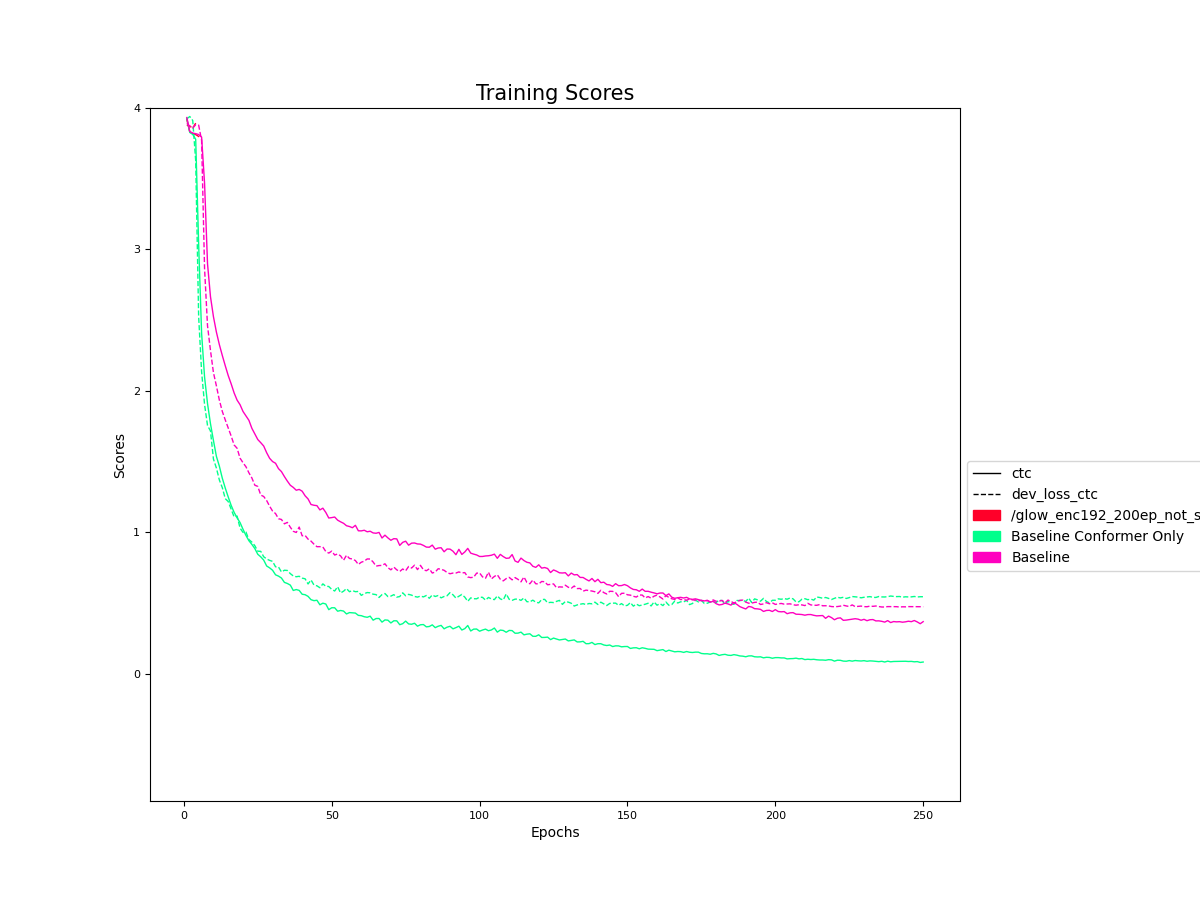

Click
Handling pick
Click
Click
Click


In [8]:
error_data = {}
labels = list(files.values())
for i, lr_file in enumerate(lr_files):
    data = get_epoch_data(lr_file, epoch=None)
    if data is None:
        continue
    for ep, ep_data in data.items():
        ep_data_error = ep_data.pop("error", {})
        error_data[(labels[i], ep)] = ep_data
        error_data[(labels[i], ep)].update(ep_data_error)
df = pd.DataFrame.from_dict(error_data, orient="index")
# plot_df(df.drop(["mle", "dp"], axis=1), plot_lr, large_font=True, shrink_axes=0.8)
plot_df(df, plot_lr=False, large_font=False, shrink_axes=0.8, ylim_max=4, ylim_min=-0.9)